# Data science and Business Analytics

In [1]:
##important library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style

In [2]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
Data = pd.read_csv('deliveries.csv')
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
data.shape #matches

(756, 18)

In [5]:
Data.shape #deliveries

(179078, 21)

Checking null values if their any

In [6]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
Data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

droping unnecessary columns from both the data set which contains higher null values# 

In [8]:

data = data.drop(columns=['umpire3'])

In [9]:
cols = ['player_dismissed','dismissal_kind','fielder']

In [10]:
Data = Data.drop(columns=cols)

In [11]:
##fill al missing value with 0
data.fillna(value=0,inplace=True)
Data.fillna(value=0,inplace=True)

In [12]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

Text(0.5, 1.0, 'Ratio of Selection after winning Toss')

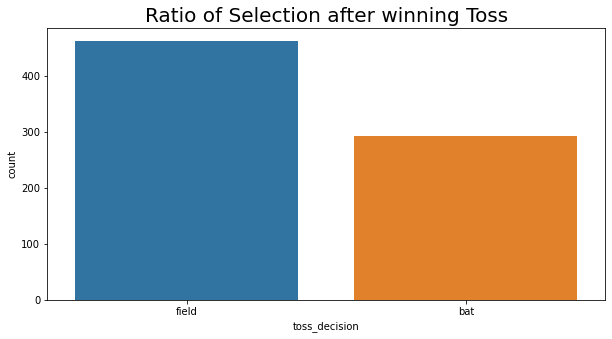

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data['toss_decision'])
plt.title("Ratio of Selection after winning Toss",fontsize=20)

In [18]:
winner_per_season=data.groupby("season")['winner'].value_counts()
winner_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        0                               1
Name: winner, Length: 103, dtype: int64

Text(0.5, 1.0, 'no of ipl match played per season')

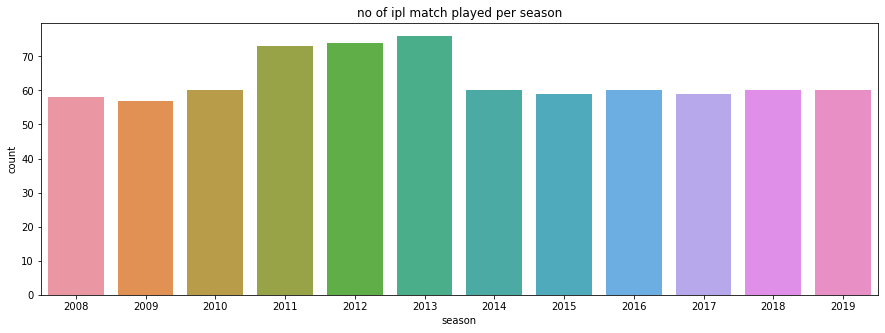

In [25]:
##now we cheak that how many match playes in a season
plt.figure(figsize=(15,5))
sns.countplot(data['season'])
plt.title('no of ipl match played per season')

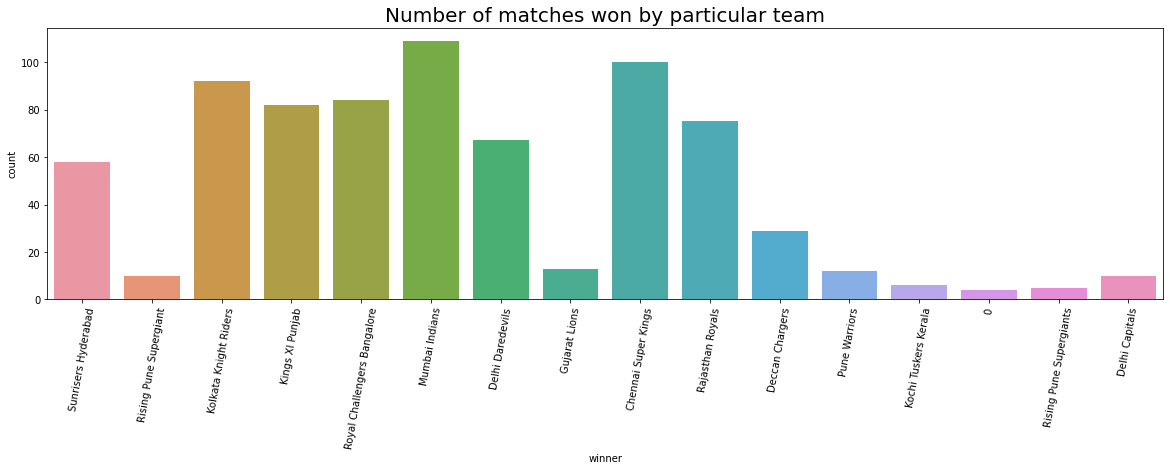

In [30]:
##now we vizualize that no of match wins by particular team
plt.figure(figsize=(20,5))
sns.countplot(data['winner'])
plt.xticks(rotation=80)
plt.title("Number of matches won by particular team",fontsize=20)
plt.show()

In [53]:
data['win_by']=np.where(data['win_by_runs']>0,'bat_first','bowl_first')
wins=data['win_by'].value_counts()
notsn__=np.array(wins.index)
size=wins.values

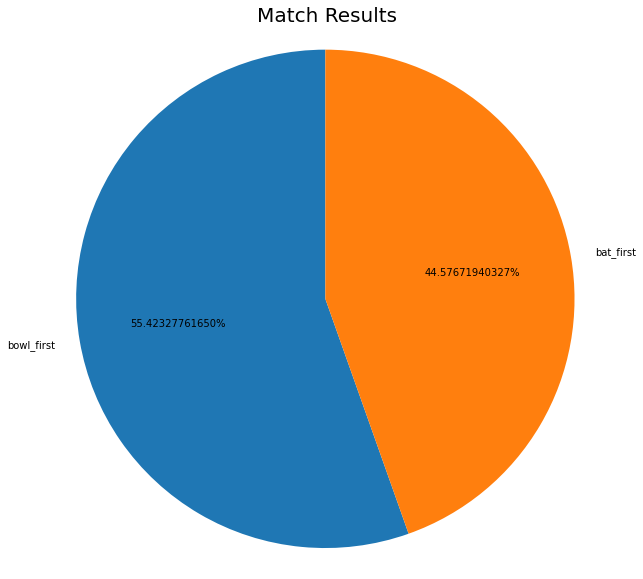

In [59]:
##here we see the  match wins on basis batting first and bowling first
plt.figure(figsize=(10,10))
plt.pie(size,labels=labels,startangle=90,autopct='%1.11f%%')
plt.title('Match Results',fontsize=20)
plt.axis('equal')
plt.show()

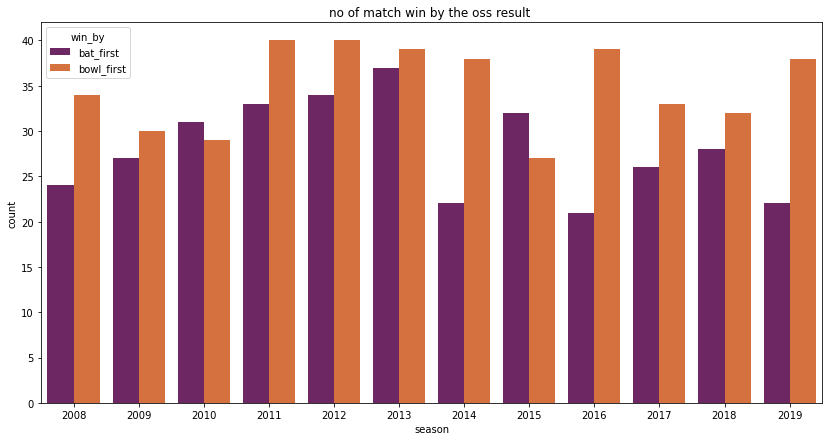

In [70]:
##here we see that the no of match wins by the toss resultw
plt.figure(figsize=(14,7))
sns.countplot("season",hue='win_by',data=data,palette='inferno')
plt.title('no of match win by the oss result ')
plt.show()

In [74]:
result=data.drop_duplicates(subset=['season'],keep='last')
result[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


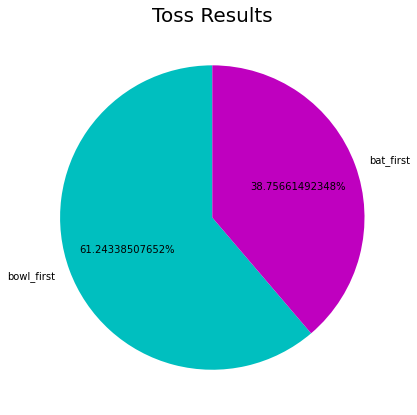

In [79]:
toss=data['toss_decision'].value_counts()
toss_notsn__=np.array('toss.index')
sizes=toss.values
colours = ['c','m']
plt.figure(figsize=(10,7))
plt.pie(sizes,labels=labels,colors=colours,autopct='%1.11f%%',startangle=90)
plt.title('Toss Results',fontsize=20)
plt.show()

# #plotting pie chart on winning percentage in final

<function matplotlib.pyplot.show(close=None, block=None)>

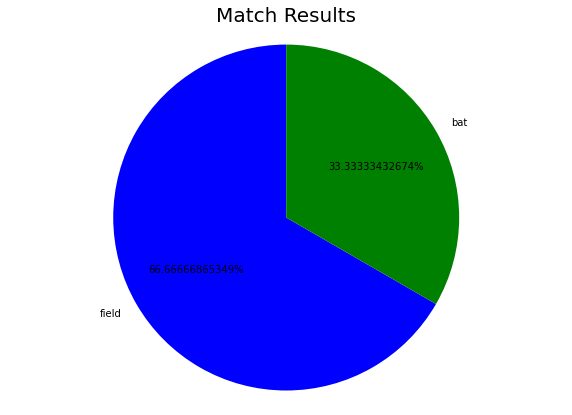

In [86]:
match = result.win_by.value_counts()
label = np.array(toss.index)
sizes = match.values
colours = ['b','g']
plt.figure(figsize=(10,7))
plt.pie(sizes,labels=label,colors=colours,autopct='%1.11f%%',startangle=90)
plt.title('Match Results',fontsize=20)
plt.axis('equal')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

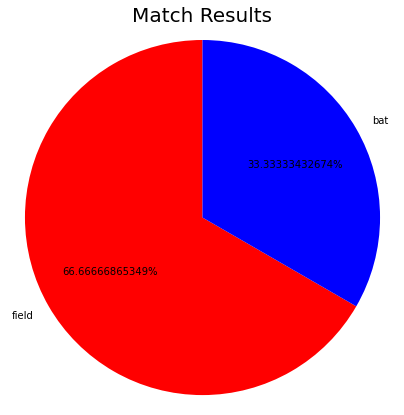

In [87]:
match = result.win_by.value_counts()
label = np.array(toss.index)
sizes = match.values
colours = ['r','b']
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label,colors=colours,autopct='%1.11f%%',startangle=90)
plt.title('Match Results',fontsize=20)
plt.axis('equal')
plt.show


In [89]:
result.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [90]:
result['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

printing toss winners , toss desicion and winning team in the final

In [91]:
result[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


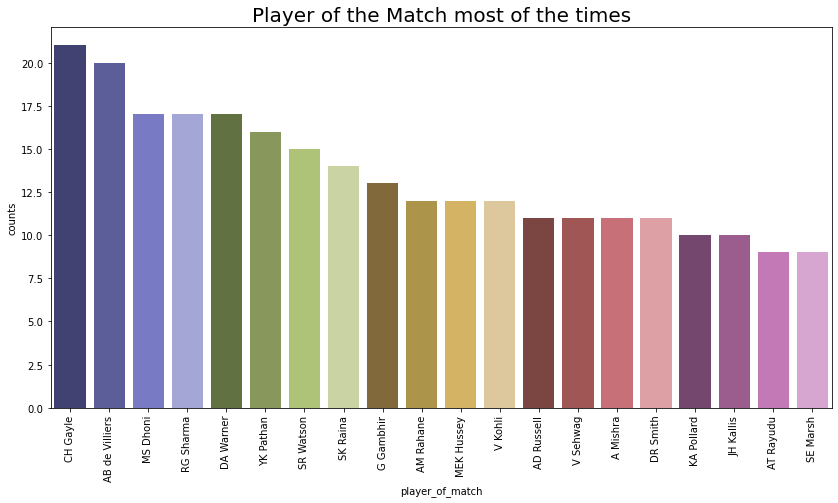

In [92]:
plt.figure(figsize=(14,7))
fav_cities = data['player_of_match'].value_counts().reset_index()
fav_cities.columns = ['player_of_match','counts']
sns.barplot(x='player_of_match',y='counts',data=fav_cities[:20],palette='tab20b')
plt.title("Player of the Match most of the times",fontsize=20)
plt.xticks(rotation=90)
plt.show()


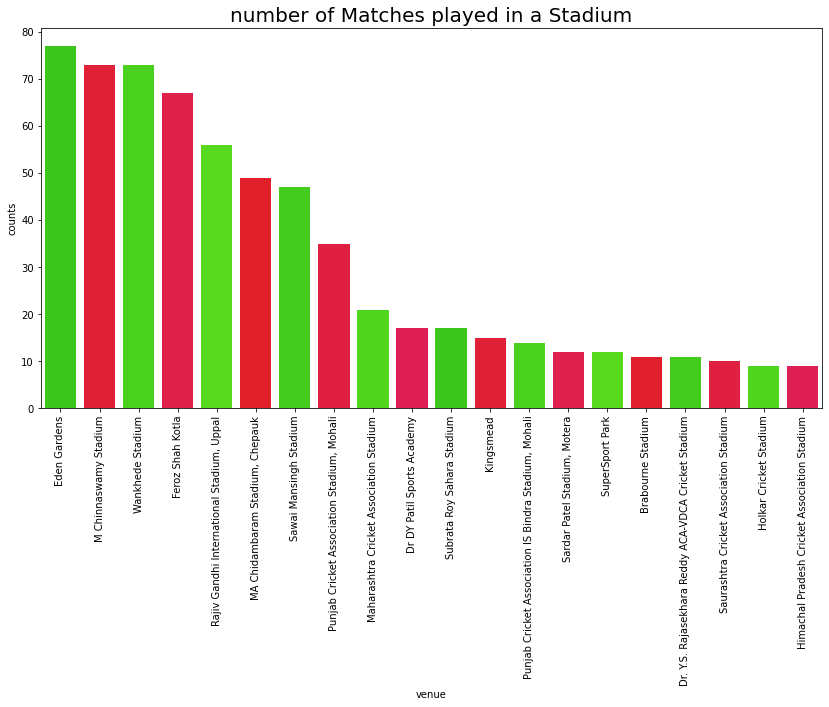

In [93]:
plt.figure(figsize=(14,7))
fav_ground = data['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','counts']
sns.barplot(x='venue',y='counts',data=fav_ground[:20],palette='prism')
plt.title("number of Matches played in a Stadium",fontsize=20)
plt.xticks(rotation=90)
plt.show()

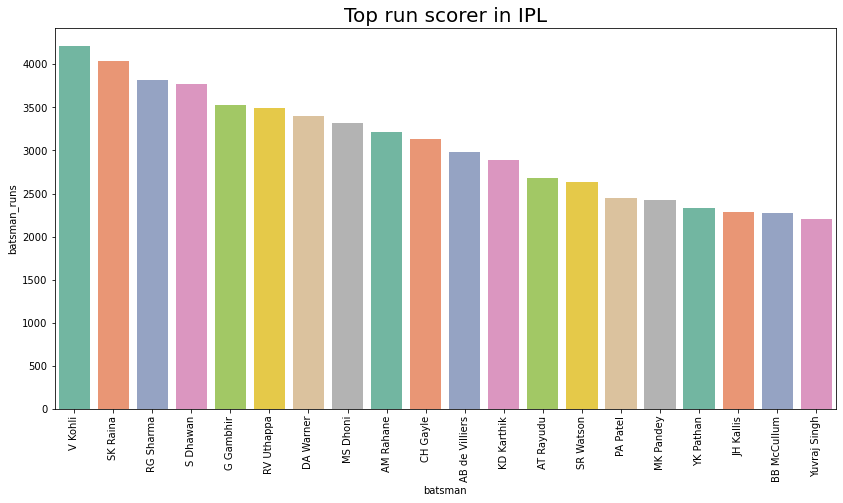

In [94]:

plt.figure(figsize=(14,7))
fav_ground = Data['batsman'].value_counts().reset_index()
fav_ground.columns = ['batsman','batsman_runs']
sns.barplot(x='batsman',y='batsman_runs',data=fav_ground[:20],palette='Set2')
plt.title("Top run scorer in IPL",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [95]:
high_scores = Data.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#reset_index() converts the obtained series into a dataframe
high_scores = high_scores[high_scores['total_runs']>=200]
#n_largest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232
